In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df=pd.read_csv("Data_Set/spam.csv", encoding='latin1')


In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.columns=["Label","Text"]

In [14]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df["Text_Length"]=df["Text"].apply(len)

<Axes: ylabel='Frequency'>

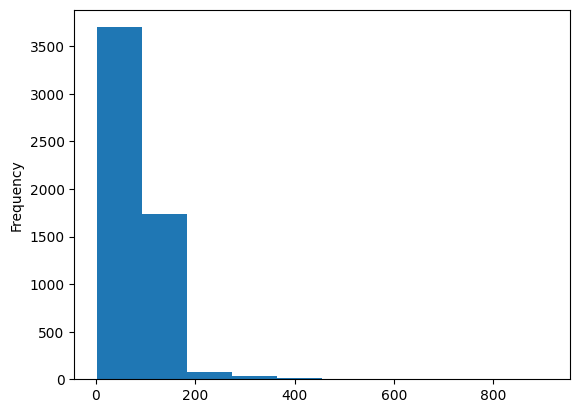

In [17]:
df.Text_Length.plot(kind="hist")

In [18]:
df.shape

(5572, 3)

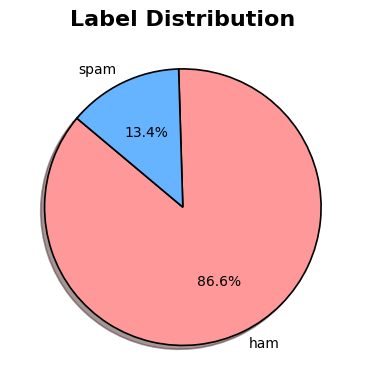

In [23]:
import matplotlib.pyplot as plt

# Sample label distribution (replace with your actual labels)
label_counts = df['Label'].value_counts()

# Colors (custom attractive palette)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Plot
plt.figure(figsize=(4, 4))
plt.pie(label_counts, 
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})

plt.title('Label Distribution', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [29]:
import string 
import re
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def clean_text_nltk(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove email addresses (optional)
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmed = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]

    # Join back to string
    cleaned_text = ' '.join(lemmatized)

    return cleaned_text


In [30]:
df["Clean_Text"]=df["Text"].apply(clean_text_nltk)

In [34]:
df["Label"]=df["Label"].map({"ham":0,"spam":1})

In [35]:
df.head()

,Label,Text,Text_Length,Clean_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goe usf live around though


In [36]:
df=df[["Clean_Text","Label"]]

In [37]:
df.head()

,Clean_Text,Label
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri wkli comp win fa cup final tkt st m...,1
3,u dun say earli hor u c alreadi say,0
4,nah dont think goe usf live around though,0


In [38]:
from sklearn.model_selection import train_test_split

# X = features, y = labels
X = df['Clean_Text']         # Or your preprocessed text column
y = df['Label']        # Your target column (e.g., 'spam' or 'ham')

# Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # maintains class balance in both sets
)

In [39]:
X_train.shape

(4457,)

In [40]:
X_test.shape

(1115,)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,      # Optional: limit features
    stop_words='english',   # Remove English stopwords
    ngram_range=(1,2)       # Unigrams and bigrams
)

# Fit on training data ONLY
X_train_vec = vectorizer.fit_transform(X_train)

# Transform test data (do NOT fit again)
X_test_vec = vectorizer.transform(X_test)

In [44]:
print(X_train_vec.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [47]:
results = []

for name, clf in classifiers.items():
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

# 6. Create summary DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("🔍 Model Comparison:")
print(results_df)

# 7. Extract Best Model
best_model_name = results_df.iloc[0]['Model']
best_model = classifiers[best_model_name]
print(f"\n✅ Best Model: {best_model_name}")

🔍 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
2      SVM (LinearSVC)  0.981166   0.981112  0.981166  0.980739
3        Random Forest  0.975785   0.976192  0.975785  0.974831
1  Logistic Regression  0.966816   0.967670  0.966816  0.964903
0          Naive Bayes  0.965919   0.966487  0.965919  0.964019
4                  KNN  0.917489   0.924664  0.917489  0.900939

✅ Best Model: SVM (LinearSVC)


In [49]:
from sklearn.metrics import classification_report
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

# 5. Make predictions
y_pred = svm_model.predict(X_test_vec)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("📊 SVM Model Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 7. Detailed report
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

📊 SVM Model Performance:
Accuracy:  0.9812
Precision: 0.9811
Recall:    0.9812
F1 Score:  0.9807

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [50]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'svm_email_classifier.pkl')

# Save the fitted TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!


In [51]:
import joblib

# Load model and vectorizer once
svm_model = joblib.load('svm_email_classifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_email_label(email_text):
    """
    Predict the label of an email using the trained SVM model.
    
    Parameters:
        email_text (str): The raw email text to classify.
    
    Returns:
        str: The predicted label (e.g., 'spam' or 'ham')
    """
    if not isinstance(email_text, str) or email_text.strip() == "":
        return "Invalid input: email text must be a non-empty string."

    # Preprocess: TF-IDF transform
    email_vector = vectorizer.transform([email_text])

    # Predict
    prediction = svm_model.predict(email_vector)

    return prediction[0]

In [52]:
sample_email = "Congratulations! You've been selected for a free gift card. Click here to claim now!"
result = predict_email_label(sample_email)
print("Predicted Label:", result)


Predicted Label: 1
